In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

kilburn = [30,31,32,33]

bookings = pd.read_json("../../chatbot_data/bookings/bookings13-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,11,4,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

klbBookings = validBookings.loc[validBookings['user'].isin(kilburn)].copy()
klbBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
223,2023-11-04 10:00:00+00:00,5400,laundry,,yes,0.47,32,electricity_consumption,30,2023-11-03 19:21:49+00:00,2023-11-03 19:21:49+00:00
224,2023-11-04 12:00:00+00:00,1800,oven,,yes,0.55,37,electricity_consumption,33,2023-11-03 21:47:57+00:00,2023-11-03 21:47:57+00:00
225,2023-11-04 12:00:00+00:00,3600,oven,,yes,0.49,32,electricity_consumption,30,2023-11-04 10:16:11+00:00,2023-11-04 10:16:11+00:00
226,2023-11-04 12:00:00+00:00,7200,other,,yes,0.36,32,electricity_consumption,30,2023-11-04 10:18:06+00:00,2023-11-04 10:18:06+00:00
227,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:13+00:00,2023-11-04 10:38:13+00:00
228,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:40+00:00,2023-11-04 10:38:40+00:00
229,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:08+00:00,2023-11-04 10:39:08+00:00
230,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:37+00:00,2023-11-04 10:39:37+00:00
231,2023-11-04 14:00:00+00:00,7200,other,,somewhat,0.36,32,electricity_consumption,30,2023-11-04 13:11:14+00:00,2023-11-04 13:11:14+00:00
232,2023-11-04 14:00:00+00:00,3600,laundry,,no,0.63,31,electricity_consumption,31,2023-11-04 13:26:02+00:00,2023-11-04 13:26:02+00:00


42 bookings were made by group Kilburn.
0 of those bookings were modified.


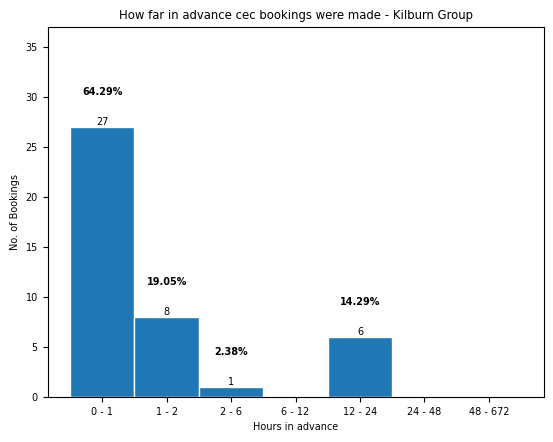

In [2]:
# Kilburn Group Analysis

# How far in advance was a booking made in hours?
klbBookings['diff'] = (klbBookings['start'] - klbBookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(klbBookings['diff'],bins)

# make modified bookings histogram
modified_bookings = klbBookings['diff'].where(klbBookings['modified_at'] > klbBookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance cec bookings were made - Kilburn Group")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(klbBookings)
print(total_bookings, 'bookings were made by group Kilburn.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all pilot group bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
    
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in pilot group
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('group_kilburn_cec_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
# User 30 -  Sara

bookingsUser30 = klbBookings.loc[klbBookings['user'] == 30].copy()

bookingsUser30

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
223,2023-11-04 10:00:00+00:00,5400,laundry,,yes,0.47,32,electricity_consumption,30,2023-11-03 19:21:49+00:00,2023-11-03 19:21:49+00:00,14.636389
225,2023-11-04 12:00:00+00:00,3600,oven,,yes,0.49,32,electricity_consumption,30,2023-11-04 10:16:11+00:00,2023-11-04 10:16:11+00:00,1.730278
226,2023-11-04 12:00:00+00:00,7200,other,,yes,0.36,32,electricity_consumption,30,2023-11-04 10:18:06+00:00,2023-11-04 10:18:06+00:00,1.698333
231,2023-11-04 14:00:00+00:00,7200,other,,somewhat,0.36,32,electricity_consumption,30,2023-11-04 13:11:14+00:00,2023-11-04 13:11:14+00:00,0.812778
233,2023-11-05 10:00:00+00:00,5400,laundry,,yes,0.47,32,electricity_consumption,30,2023-11-04 16:27:52+00:00,2023-11-04 16:27:52+00:00,17.535556
234,2023-11-05 11:30:00+00:00,7200,other,,somewhat,0.36,32,electricity_consumption,30,2023-11-04 16:30:55+00:00,2023-11-04 16:30:55+00:00,18.984722
237,2023-11-05 11:00:00+00:00,1800,hob,,yes,0.13,32,electricity_consumption,30,2023-11-05 10:02:37+00:00,2023-11-05 10:02:37+00:00,0.956389
238,2023-11-05 11:00:00+00:00,1800,oven,,yes,0.36,32,electricity_consumption,30,2023-11-05 10:35:17+00:00,2023-11-05 10:35:17+00:00,0.411944
242,2023-11-05 13:30:00+00:00,7200,other,,yes,0.36,32,electricity_consumption,30,2023-11-05 13:23:36+00:00,2023-11-05 13:23:36+00:00,0.106667
243,2023-11-06 09:30:00+00:00,5400,laundry,,yes,0.47,32,electricity_consumption,30,2023-11-05 19:43:11+00:00,2023-11-05 19:43:11+00:00,13.780278


15 bookings were made by User 30 - Sara.
0 of those bookings were modified.


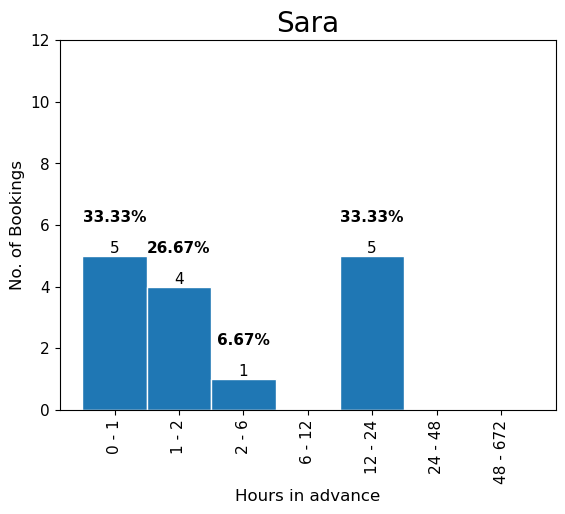

In [4]:
# Booking pattern for User 30

# How far in advance was a booking made in hours?
bookingsUser30['diff'] = (bookingsUser30['start'] - bookingsUser30['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser30['diff'],bins)

# make modified bookings histogram
modified_bookings_user_30 = bookingsUser30['diff'].where(bookingsUser30['modified_at'] > bookingsUser30['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_30, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Sara", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser30)
print(total_bookings, 'bookings were made by User 30 - Sara.')
print(modified_bookings_user_30.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 30 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 27
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 12  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('sara_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# User 31 - Adam

bookingsUser31 = klbBookings.loc[klbBookings['user'] == 31].copy()

bookingsUser31

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
232,2023-11-04 14:00:00+00:00,3600,laundry,,no,0.63,31,electricity_consumption,31,2023-11-04 13:26:02+00:00,2023-11-04 13:26:02+00:00,0.566111
235,2023-11-05 10:00:00+00:00,3600,dishwasher,,no,0.45,31,electricity_consumption,31,2023-11-05 09:11:14+00:00,2023-11-05 09:11:14+00:00,0.812778
240,2023-11-05 12:00:00+00:00,3600,laundry,,no,0.63,31,electricity_consumption,31,2023-11-05 11:23:14+00:00,2023-11-05 11:23:14+00:00,0.612778
249,2023-11-06 15:00:00+00:00,3600,dishwasher,,yes,0.45,31,electricity_consumption,31,2023-11-06 14:22:09+00:00,2023-11-06 14:22:09+00:00,0.630833
250,2023-11-07 09:00:00+00:00,3600,dishwasher,,yes,0.45,31,electricity_consumption,31,2023-11-07 08:24:35+00:00,2023-11-07 08:24:35+00:00,0.590278
254,2023-11-08 10:00:00+00:00,3600,dishwasher,,yes,0.45,31,electricity_consumption,31,2023-11-08 08:13:23+00:00,2023-11-08 08:13:23+00:00,1.776944
255,2023-11-08 10:00:00+00:00,7200,laundry,,yes,1.32,31,electricity_consumption,31,2023-11-08 08:29:14+00:00,2023-11-08 08:29:14+00:00,1.512778
257,2023-11-08 13:00:00+00:00,3600,laundry,,yes,0.63,31,electricity_consumption,31,2023-11-08 12:36:15+00:00,2023-11-08 12:36:15+00:00,0.395833
258,2023-11-08 13:00:00+00:00,3600,laundry,,yes,0.63,31,electricity_consumption,31,2023-11-08 12:36:15+00:00,2023-11-08 12:36:15+00:00,0.395833
259,2023-11-08 13:00:00+00:00,3600,laundry,,yes,0.63,31,electricity_consumption,31,2023-11-08 12:36:47+00:00,2023-11-08 12:36:47+00:00,0.386944


12 bookings were made by User 31 - Adam.
0 of those bookings were modified.


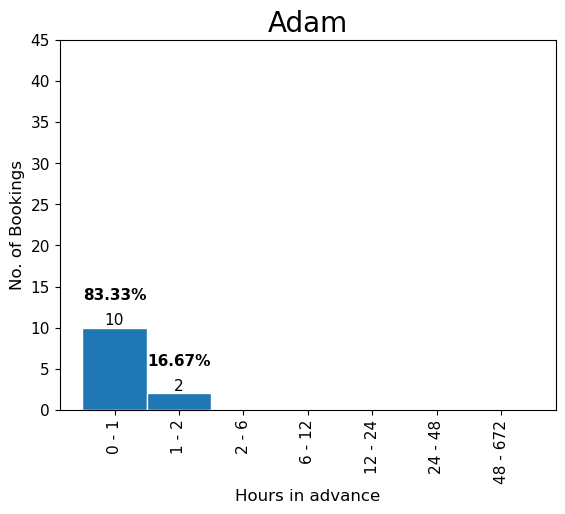

In [7]:
# Booking pattern for User 31

# How far in advance was a booking made in hours?
bookingsUser31['diff'] = (bookingsUser31['start'] - bookingsUser31['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser31['diff'],bins)

# make modified bookings histogram
modified_bookings_user_31 = bookingsUser31['diff'].where(bookingsUser31['modified_at'] > bookingsUser31['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_31, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Adam", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser31)
print(total_bookings, 'bookings were made by User 31 - Adam.')
print(modified_bookings_user_31.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 31 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 31
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 45  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('adam_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# User 32 - Ute

bookingsUser32 = klbBookings.loc[klbBookings['user'] == 32].copy()

bookingsUser32

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
227,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:13+00:00,2023-11-04 10:38:13+00:00,0.363056
228,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:40+00:00,2023-11-04 10:38:40+00:00,0.355556
229,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:08+00:00,2023-11-04 10:39:08+00:00,0.347778
230,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:37+00:00,2023-11-04 10:39:37+00:00,0.339722
236,2023-11-05 10:00:00+00:00,3600,laundry,Going out later,yes,0.41,23,electricity_consumption,32,2023-11-05 09:48:02+00:00,2023-11-05 09:48:02+00:00,0.199444
239,2023-11-05 12:00:00+00:00,4320,laundry,Going out later,yes,0.41,23,electricity_consumption,32,2023-11-05 11:14:36+00:00,2023-11-05 11:14:36+00:00,0.756667
241,2023-11-05 12:00:00+00:00,4320,laundry,Going out later,yes,0.69,23,electricity_consumption,32,2023-11-05 11:43:59+00:00,2023-11-05 11:43:59+00:00,0.266944
246,2023-11-06 10:00:00+00:00,4320,laundry,Going to work this afternoon,yes,0.41,23,electricity_consumption,32,2023-11-06 09:01:27+00:00,2023-11-06 09:01:27+00:00,0.975833
248,2023-11-06 11:30:00+00:00,4320,dishwasher,Going into the office this afternoon,yes,0.46,23,electricity_consumption,32,2023-11-06 10:47:52+00:00,2023-11-06 10:47:52+00:00,0.702222
251,2023-11-07 09:00:00+00:00,4320,laundry,I’m working from home today,yes,0.69,23,electricity_consumption,32,2023-11-07 08:56:10+00:00,2023-11-07 08:56:10+00:00,0.063889


14 bookings were made by User 32 - Ute.
0 of those bookings were modified.


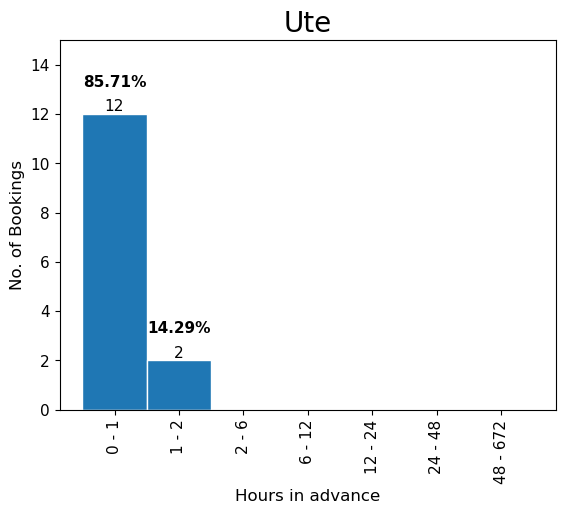

In [9]:
# Booking pattern for User 32 - Ute

# How far in advance was a booking made in hours?
bookingsUser32['diff'] = (bookingsUser32['start'] - bookingsUser32['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser32['diff'],bins)

# make modified bookings histogram
modified_bookings_user_32 = bookingsUser32['diff'].where(bookingsUser32['modified_at'] > bookingsUser32['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_32, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Ute", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser32)
print(total_bookings, 'bookings were made by User 32 - Ute.')
print(modified_bookings_user_32.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 25 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 25
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 15  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('ute_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# User 33 - Dannie

bookingsUser33 = klbBookings.loc[klbBookings['user'] == 33].copy()

bookingsUser33

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
224,2023-11-04 12:00:00+00:00,1800,oven,,yes,0.55,37,electricity_consumption,33,2023-11-03 21:47:57+00:00,2023-11-03 21:47:57+00:00,14.200833


1 bookings were made by User 33 - Dannie.
0 of those bookings were modified.


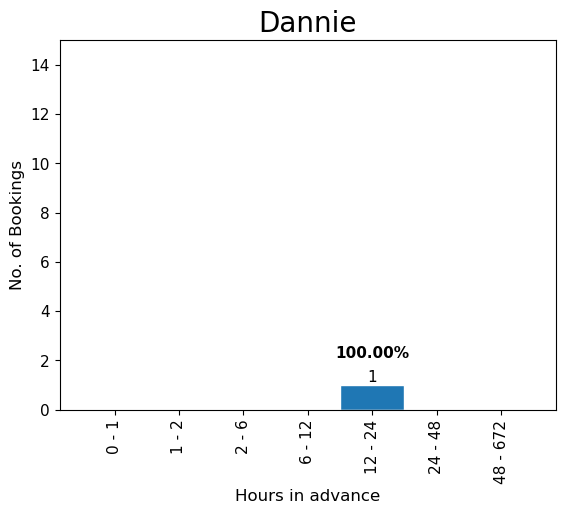

In [12]:
# Booking pattern for User 33 - Dannie

# How far in advance was a booking made in hours?
bookingsUser33['diff'] = (bookingsUser33['start'] - bookingsUser33['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser33['diff'],bins)

# make modified bookings histogram
modified_bookings_user_33 = bookingsUser33['diff'].where(bookingsUser33['modified_at'] > bookingsUser33['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_33, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Dannie", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser33)
print(total_bookings, 'bookings were made by User 33 - Dannie.')
print(modified_bookings_user_33.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 24 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 24
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 15  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('dannie_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()